In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv')
mm =4

In [3]:
print('{} Data da atualização'.format(df.date.tail(1).tolist()))
#df.city.loc[(df['state'] == 'SP')].unique() #Lista de cidades

['2020-05-12'] Data da atualização


In [4]:
setecidades = ['Santo André/SP', 'São Bernardo do Campo/SP', 'São Caetano do Sul/SP', 'Diadema/SP','Mauá/SP','Ribeirão Pires/SP', 'Rio Grande da Serra/SP']
dfsetecidades = df[df['city'].isin(setecidades)]
dfsetecidades.date= pd.to_datetime(dfsetecidades.date)

/home/caio/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
df_pivot = dfsetecidades.pivot(index='date', columns='city', values='deaths')
df_pivot.fillna(0, inplace=True)
cidades = list(df_pivot.columns)
for col in df_pivot.columns:
    df_pivot[col] = pd.to_numeric(df_pivot[col], downcast='integer')
covid = df_pivot.reset_index('date')
covid.set_index(['date'],inplace=True)


covid.columns = cidades
covidmedia = covid.rolling(mm).mean()

In [6]:
df_pivot100 = dfsetecidades.pivot(index='date', columns='city', values='deaths_per_100k_inhabitants')
df_pivot100.fillna(0, inplace=True)
for col in df_pivot100.columns:
    df_pivot100[col] = round(df_pivot100[col], 2)
covid100 = df_pivot100.reset_index('date')
covid100.set_index(['date'],inplace=True)


covid100.columns = cidades
covid100media = covid100.rolling(mm).mean()

Text(2020-03-16 00:00:00, -4.482, 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv')

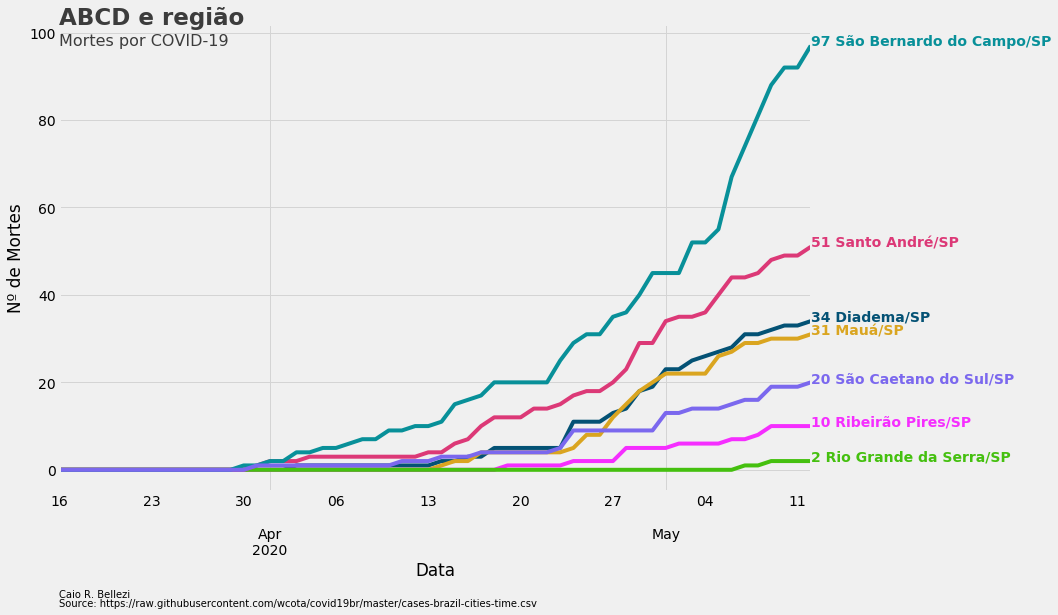

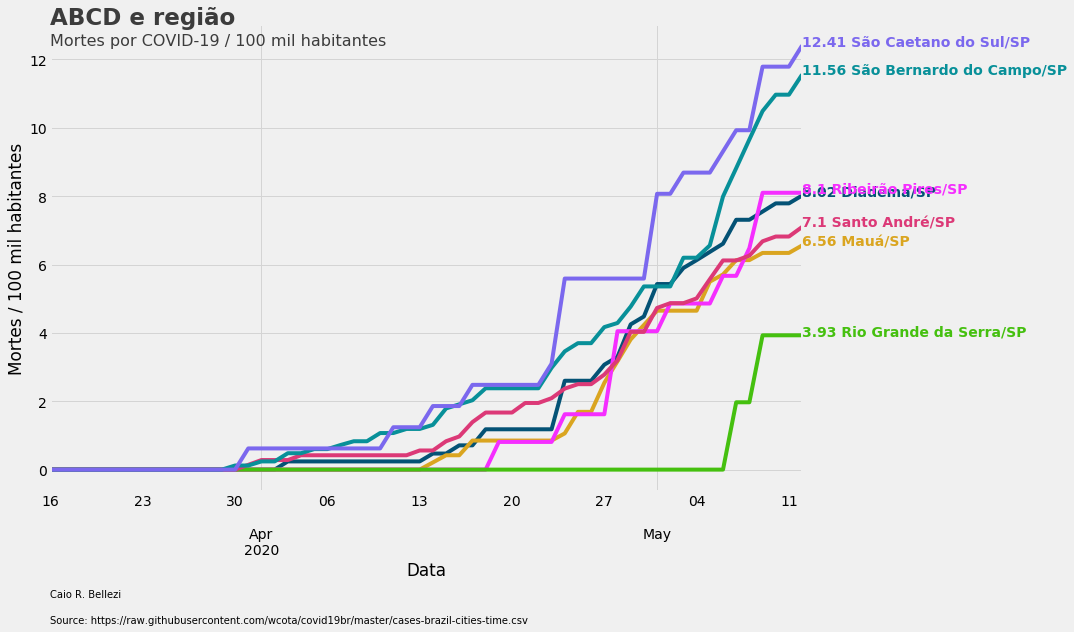

In [7]:
colors = {'Diadema/SP':'#045275','Mauá/SP':'#DAA520','Ribeirão Pires/SP':'#f52eff', 
          'Rio Grande da Serra/SP':'#45c00f','Santo André/SP':'#DC3977','São Bernardo do Campo/SP':'#089099',
          'São Caetano do Sul/SP':'#7B68EE'}
plt.style.use('fivethirtyeight')

plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=4, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Data')
plot.set_ylabel('Nº de Mortes')

for cidade in list(colors.keys()):
    plot.text(x = (covid.index[-1]), y = covid[cidade].max(), color = colors[cidade], s =str(covid[cidade].max())+' '+cidade, weight = 'bold')

plot.text(x = covid.index[0], y = int(covid.max().max())*1.05, s = "ABCD e região", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[0], y = int(covid.max().max()), s = "Mortes por COVID-19", fontsize = 16, alpha = .75)
plot.text(x = covid.index[0], y = int(covid.max().max())*-0.30,s = 'Caio R. Bellezi',multialignment='left' , fontsize = 10)
plot.text(x = covid.index[0], y = -2+int(covid.max().max())*-0.30,s = 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv',multialignment='left' , fontsize = 10)



plot100 = covid100.plot(figsize=(12,8), color=list(colors.values()), linewidth=4, legend=False)
plot100.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot100.grid(color='#d4d4d4')
plot100.set_xlabel('Data')
plot100.set_ylabel('Mortes / 100 mil habitantes')

for cidade in list(colors.keys()):
    plot100.text(x = (covid100.index[-1]), y = covid100[cidade].max(), color = colors[cidade], s =str(covid100[cidade].max())+' '+cidade, weight = 'bold')

plot100.text(x = covid100.index[0], y = (covid100.max().max())*1.05, s = "ABCD e região", fontsize = 23, weight = 'bold', alpha = .75)
plot100.text(x = covid100.index[0], y = (covid100.max().max()), s = "Mortes por COVID-19 / 100 mil habitantes", fontsize = 16, alpha = .75)
plot100.text(x = covid100.index[0], y = (covid100.max().max())*-0.30,s = 'Caio R. Bellezi',multialignment='left' , fontsize = 10)
plot100.text(x = covid100.index[0], y = -2+(covid100.max().max())*-0.20,s = 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv',multialignment='left' , fontsize = 10)
            

Text(2020-03-16 00:00:00, -5.059725, 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv')

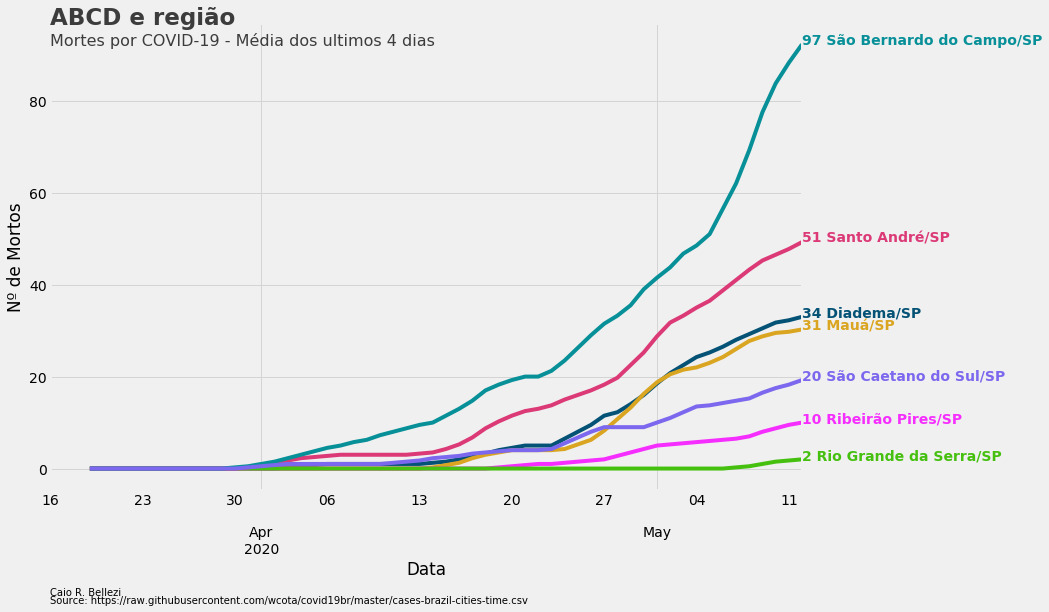

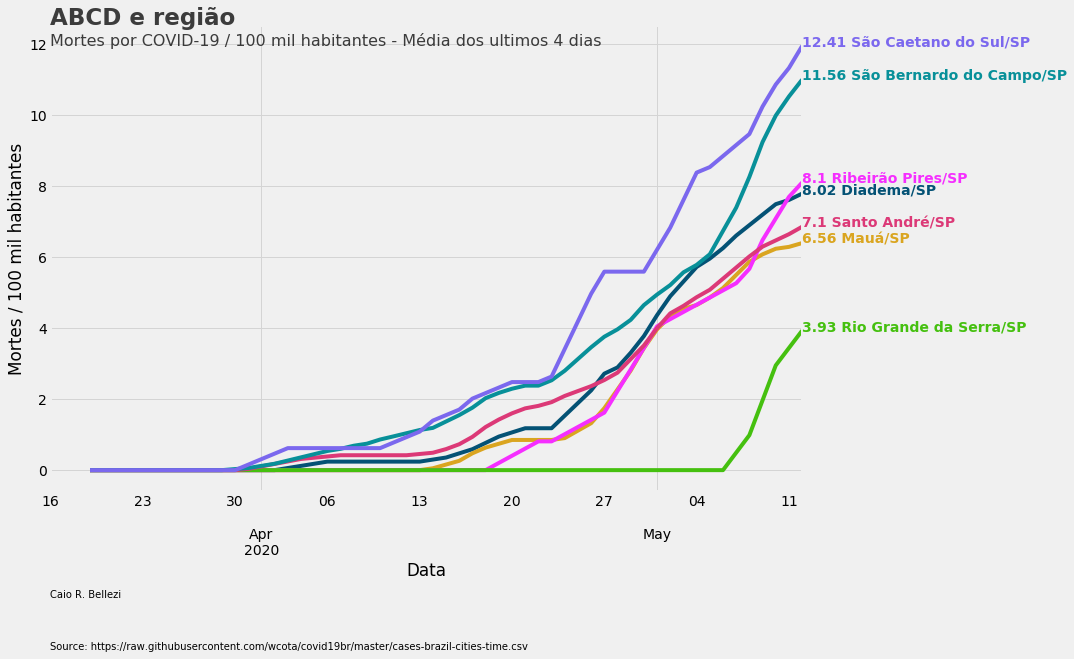

In [9]:
colors = {'Diadema/SP':'#045275','Mauá/SP':'#DAA520','Ribeirão Pires/SP':'#f52eff', 
          'Rio Grande da Serra/SP':'#45c00f','Santo André/SP':'#DC3977','São Bernardo do Campo/SP':'#089099',
          'São Caetano do Sul/SP':'#7B68EE'}
plt.style.use('fivethirtyeight')

plotmedia = covidmedia.plot(figsize=(12,8), color=list(colors.values()), linewidth=4, legend=False)
plotmedia.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plotmedia.grid(color='#d4d4d4')
plotmedia.set_xlabel('Data')
plotmedia.set_ylabel('Nº de Mortos')

for cidade in list(colors.keys()):
    plotmedia.text(x = (covidmedia.index[-1]), y = covidmedia[cidade].max(), color = colors[cidade], s =str(covid[cidade].max())+' '+cidade, weight = 'bold')

plotmedia.text(x = covidmedia.index[0], y = int(covidmedia.max().max())*1.05, s = "ABCD e região", fontsize = 23, weight = 'bold', alpha = .75)
plotmedia.text(x = covidmedia.index[0], y = int(covidmedia.max().max()), s = "Mortes por COVID-19 - Média dos ultimos "+str(mm)+" dias", fontsize = 16, alpha = .75)
plotmedia.text(x = covidmedia.index[0], y = int(covidmedia.max().max())*-0.30,s = 'Caio R. Bellezi',multialignment='left' , fontsize = 10)
plotmedia.text(x = covidmedia.index[0], y = -20+int(covidmedia.max().max())*-0.10,s = 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv',multialignment='left' , fontsize = 10)
            
    


plot100media = covid100media.plot(figsize=(12,8), color=list(colors.values()), linewidth=4, legend=False)
plot100media.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot100media.grid(color='#d4d4d4')
plot100media.set_xlabel('Data')
plot100media.set_ylabel('Mortes / 100 mil habitantes')

for cidade in list(colors.keys()):
    plot100media.text(x = (covid100media.index[-1]), y = covid100media[cidade].max(), color = colors[cidade], s =str(covid100[cidade].max())+' '+cidade, weight = 'bold')

plot100media.text(x = covid100media.index[0], y = (covid100media.max().max())*1.05, s = "ABCD e região", fontsize = 23, weight = 'bold', alpha = .75)
plot100media.text(x = covid100media.index[0], y = (covid100media.max().max()), s = "Mortes por COVID-19 / 100 mil habitantes - Média dos ultimos "+str(mm)+" dias", fontsize = 16, alpha = .75)
plot100media.text(x = covid100media.index[0], y = (covid100media.max().max())*-0.30,s = 'Caio R. Bellezi',multialignment='left' , fontsize = 10)
plot100media.text(x = covid100media.index[0], y = -5+(covid100media.max().max())*-0.005,s = 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv',multialignment='left' , fontsize = 10)
                